In [1]:
# import the required modules and create a dataframe from the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("dataset-cleaned.csv")
# df = pd.read_csv("C:\\Users\\vpala\Artificial Intelligence\\BeCode\\challenge-collecting-data\\utils\\properties.csv")

In [137]:
# show first rows of the dataframe

df.head()

,Unnamed: 0,Unnamed: 0.1,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool
0,0,0,6061 Montignies-sur-Sambre,House,35000,3,201,Installed,0,0,0,NaN,0,NaN,201,201,2,To restore,0
1,1,1,6183 Trazegnies,House,35000,2,201,Installed,0,0,0,NaN,0,NaN,201,201,2,Good,0
2,2,2,6020 Dampremy,House,35000,2,201,Installed,0,0,0,NaN,0,NaN,201,201,2,To renovate,0
3,3,3,6592 Monceau-Imbrechies,House,35000,3,201,Installed,0,0,0,NaN,0,NaN,201,201,2,Good,0
4,4,4,7390 Quaregnon,House,35000,2,94,Installed,0,0,0,NaN,0,NaN,94,44,2,To renovate,0


In [138]:
# drop the first two columns

df = df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [142]:
df.columns

Index(['locality', 'proprety_type', 'price', 'bedrooms', 'area',
       'equipped_kitchen', 'furnished', 'open_fire', 'terrace', 'terrace_area',
       'garden', 'garden_area', 'surface', 'surface_plot', 'facades', 'state',
       'swimming_pool'],
      dtype='object')

# Number of rows and columns in the dataframe :

In [192]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe.")

There are 13505 rows and 19 columns in the dataframe.


# Target variable : price

In [141]:
# mean and median of house prices

print(f"Price mean : {round(df.price.mean())}\nPrice median : {round(df.price.median())}\nPrice standard deviation : {round(df.price.std())}")

Price mean : 507788
Price median : 165000
Price standard deviation : 841968


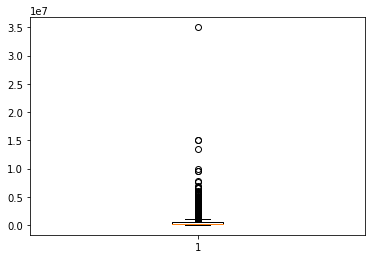

In [35]:
plt.boxplot(df.price)
plt.show()

In [85]:
# remove outliers

clean_price = df[abs(stats.zscore(df.price)) < 3]

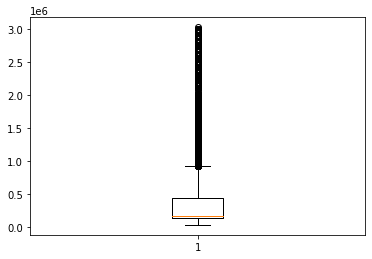

In [37]:
plt.boxplot(clean_price.price)
plt.show()

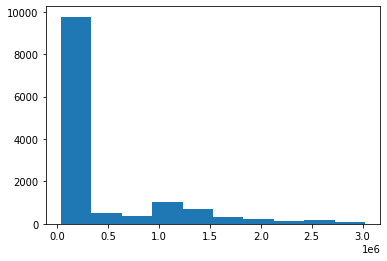

In [38]:
plt.hist(clean_price.price)
plt.show()

C:\Users\vpala\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

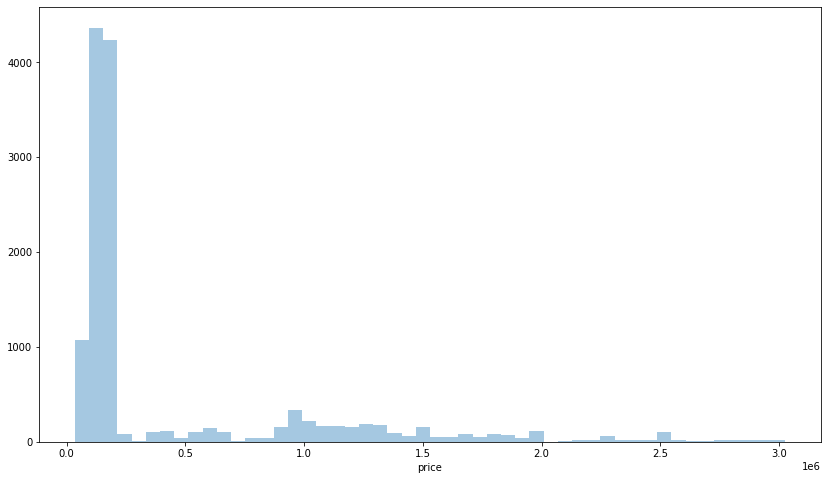

In [39]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.distplot(clean_price["price"], kde=False)

# Correlation between the variables and the target :

In [191]:
df.corr()

,price,bedrooms,area,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,swimming_pool,price_square_meters
price,1,0,0,-0,NaN,0,0,0,0,0,0,0,0,1
bedrooms,0,1,1,0,NaN,0,0,0,0,1,0,0,0,0
area,0,1,1,-0,NaN,-0,0,0,0,1,0,0,0,-0
furnished,-0,0,-0,1,NaN,-0,-0,-0,-0,-0,-0,-0,-0,0
open_fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
terrace,0,0,-0,-0,NaN,1,NaN,0,-0,-0,-0,0,0,0
terrace_area,0,0,0,-0,NaN,NaN,1,0,0,0,0,0,0,0
garden,0,0,0,-0,NaN,0,0,1,NaN,0,0,0,0,-0
garden_area,0,0,0,-0,NaN,-0,0,NaN,1,0,1,0,-0,0
surface,0,1,1,-0,NaN,-0,0,0,0,1,0,0,0,-0


### Correlation between the price and the number of bedrooms :

In [187]:
round(df["price"].corr(df["bedrooms"]), 3)

0.464

### Correlation between the price and the surface :

In [188]:
round(df["price"].corr(df["surface"]), 3)

0.456

### Correlation between the price and the terrace area :

In [189]:
round(df["price"].corr(df["terrace_area"]), 3)

0.36

### Correlation between the price and the garden area :

In [190]:
round(df["price"].corr(df["garden_area"]), 3)

0.158

# Most expensive municipalities in Belgium :

In [143]:
df["locality_code"] = df.locality.apply(lambda x: x[:4]) # create a new column with the postcode
df["price_square_meters"] = df["price"]/df["surface"] # create a column with the price per square meter

In [146]:
df.columns

Index(['locality', 'proprety_type', 'price', 'bedrooms', 'area',
       'equipped_kitchen', 'furnished', 'open_fire', 'terrace', 'terrace_area',
       'garden', 'garden_area', 'surface', 'surface_plot', 'facades', 'state',
       'swimming_pool', 'locality_code', 'price_square_meters'],
      dtype='object')

In [147]:
df[["locality_code", "price_square_meters"]]

,locality_code,price_square_meters
0,6061,174
1,6183,174
2,6020,174
3,6592,174
4,7390,372
...,...,...
13500,2000,6131
13501,2380,1301
13502,1950,9184
13503,8430,3632


In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x) # avoid scientific notation of numbers

### Mean price per locality :

In [193]:
df.groupby("locality_code")["price"].mean().sort_values(ascending=False).head()

locality_code
3150   12775000
7021    4390000
3470    3900000
1404    3200000
2240    2975000
Name: price, dtype: float64

In [161]:
df[df['locality_code'] == "3150"]
# not enough data to conclude (only three properties, one of which has a much larger price compared to the rest of the whole dataframe)

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
3144,3150 Haacht,Apartment block,35000000,2,201,Installed,0,0,0,NaN,0,NaN,201,201,4,Good,0,3150,173752
3803,3150 Haacht,House,1950000,8,500,Hyper equipped,0,0,0,NaN,0,NaN,500,100000,4,Good,0,3150,3900
7688,3150 Tildonk,Manor house,1375000,3,280,Hyper equipped,0,0,1,50,0,NaN,280,17000,4,As new,0,3150,4911


### Median price per locality :

In [198]:
df.groupby("locality_code")["price"].median().sort_values(ascending=False).head()

locality_code
3470   3900000
8554   3300000
1404   3200000
2240   2975000
5520   2822500
Name: price, dtype: float64

In [197]:
df[df['locality_code'] == "3470"] # not enough data to make conclusions

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
3266,3470 Kortenaken,Castle,3900000,9,1300,Installed,0,0,0,NaN,0,NaN,1300,250000,4,As new,0,3470,3000


### Mean square meter price per locality :

In [164]:
df.groupby("locality_code")["price_square_meters"].mean().sort_values(ascending=False).head(10)

locality_code
3150   60854
2240   14769
8300   11647
8301    9076
6680    8788
1950    8095
2520    8059
1602    7943
9111    7271
3660    6900
Name: price_square_meters, dtype: float64

In [168]:
df[df['locality_code'] == "2240"] # not enough data to make conclusions (only one property for sale in Zandhoven)

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
3377,2240 Zandhoven,House,2975000,5,201,USA hyper equipped,0,0,0,NaN,0,NaN,201,29361,4,As new,0,2240,14769


### Median square meter price per locality :

In [166]:
df.groupby("locality_code")["price_square_meters"].median().sort_values(ascending=False).head(10)

locality_code
2240   14769
8300    9690
8301    9409
1950    9184
9111    9027
6680    8788
1602    7943
3660    6900
5561    6702
8554    6600
Name: price_square_meters, dtype: float64

In [215]:
df[df['locality_code'] == "8300"]
# According to our data, Knokke-Heist (8300) (303 inputs) seems to be the most expensive locality of Belgium,
# followed by Heist-aan-Zee (8301) (45 inputs) and Kraainem 1950 (44 inputs).

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
3158,8300 Knokke-Heist Knokke,Exceptional property,5900000,12,995,Installed,0,0,0,NaN,0,NaN,995,995,2,Good,0,8300,5930
3160,8300 Knokke,House,5900000,2,1000,Installed,0,0,0,NaN,0,NaN,1000,250,2,Good,0,8300,5900
3169,8300 Knokke-Heist,Villa,5250000,5,368,USA hyper equipped,0,0,0,NaN,1,1143,368,1143,4,As new,0,8300,14266
3177,8300 Knokke-Heist,Ground floor,4950000,4,188,Hyper equipped,0,0,0,NaN,1,350,188,188,3,As new,0,8300,26330
3180,8300 Knokke-Heist,Ground floor,4950000,4,188,USA hyper equipped,0,0,0,NaN,0,NaN,188,188,3,Good,0,8300,26330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12343,8300 Knokke-Heist,Apartment,915000,2,201,Installed,0,0,1,38,0,NaN,201,201,2,As new,0,8300,4542
12403,8300 Knokke-Heist,Apartment,899000,3,201,Installed,0,0,0,NaN,0,NaN,201,201,2,Good,0,8300,4463
12405,8300 Knokke-Heist,Duplex,899000,3,120,Installed,0,0,1,15,0,NaN,120,120,2,As new,0,8300,7492
12435,8300 Knokke-Heist,Apartment,895000,3,106,Hyper equipped,0,0,0,NaN,0,NaN,106,106,2,As new,0,8300,8443
